In [7]:
import pandas as pd
import CococoNet_reader
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import Name_resolver
import tqdm as tq

In [8]:
def get_ncbi_clean_og2gene_for_species(
    species_1, og2genes_only_cococonet, ncbi_mapping
):

    species_1_name = Name_resolver.species_name_resolver(
        species_1, desired_type="common"
    )

    first_species_ortho_groups = og2genes_only_cococonet.loc[
        og2genes_only_cococonet["Species"] == species_1
    ]
    shared_orthogroups = first_species_ortho_groups["Orthogroup"].unique()

    list_of_orthogene_pds = []
    for orthogroup in tq.tqdm(
        shared_orthogroups, desc="inner_loop", position=0, leave=False
    ):
        species_1_genes = (
            first_species_ortho_groups["Gene"]
            .loc[first_species_ortho_groups["Orthogroup"] == orthogroup]
            .to_list()
        )
        all_gene_combos = species_1_genes
        current_orthogroup_pd = pd.DataFrame(
            columns=[f"{species_1_name} OrthoGene"], data=all_gene_combos
        )
        current_orthogroup_pd["Orthogroup"] = orthogroup
        list_of_orthogene_pds.append(current_orthogroup_pd)

    final_species_lineup = pd.concat(list_of_orthogene_pds)
    ncbi_added_once = final_species_lineup.merge(
        right=ncbi_mapping[["Orthodb Gene", "Symbol"]],
        right_on="Orthodb Gene",
        left_on=f"{species_1_name} OrthoGene",
    )
    ncbi_added_once_clean = ncbi_added_once.drop(columns="Orthodb Gene")
    return ncbi_added_once_clean

In [4]:
og_groups = pd.read_csv(
    "/data/passala/OrthoDB_data/NCBI_data/og_2_Genes_with_ncbi_symbol.csv"
)
og_groups

,Orthogroup,Gene,Species,Ortholevel,Orthodb Gene,Symbol
0,100007at3193,4558_0:003a4f,4558,3193,4558_0:003a4f,LOC110434333
1,100007at3193,4577_0:004254,4577,3193,4577_0:004254,LOC100276500
2,100007at3193,4577_0:004e43,4577,3193,4577_0:004e43,LOC100275058
3,100067at3193,4558_0:00439a,4558,3193,4558_0:00439a,LOC8071983
4,100085at3193,4558_0:002fd8,4558,3193,4558_0:002fd8,LOC8086335
...,...,...,...,...,...,...
502887,9969at3193,15368_0:000e9a,15368,3193,15368_0:000e9a,LOC100834561
502888,99917at3193,39947_0:006297,39947,3193,39947_0:006297,LOC107276177
502889,99917at3193,39947_0:00634f,39947,3193,39947_0:00634f,LOC9269479
502890,99917at3193,39947_0:006629,39947,3193,39947_0:006629,LOC9269626


In [5]:
ncbi_mapping = pd.read_csv(
    "/data/passala/OrthoDB_data/NCBI_data/merged_ncbi_to_orthodb_fixed_non_genesymbol.csv"
)

In [18]:
cleaned_og

,tomato OrthoGene,Orthogroup,Symbol
0,4081_0:002534,10009at3193,LOC101245541
1,4081_0:0062c9,10009at3193,LOC101249449
2,4081_0:0044e5,10092at3193,GPA1
3,4081_0:0060db,10147at3193,LOC101260909
4,4081_0:001ce5,10228at3193,LOC101262196
...,...,...,...
25093,4081_0:006159,9877at3193,LOC101260902
25094,4081_0:00201e,9919at3193,LOC101252265
25095,4081_0:000a73,9942at3193,GDI1
25096,4081_0:003f8c,9942at3193,LOC101261051


In [19]:
tomato_og = get_ncbi_clean_og2gene_for_species(
    4081, og_groups, ncbi_mapping=ncbi_mapping
)

In [20]:
arabi_og = get_ncbi_clean_og2gene_for_species(
    3702, og_groups, ncbi_mapping=ncbi_mapping
)

In [22]:
arabi_csv_uncleaned = pd.read_csv(
    "/data/passala/Module_paper_data/Arabi_tomato_heat_stress_comparison/arabi_data/GSE94015_gene_readCount.txt",
    sep="\t",
)
arabi_csv = arabi_csv_uncleaned[
    [
        "Locus",
        "WtRL0h_rep1",
        "WtRL0h_rep2",
        "WtRL0h_rep3",
        "WtRL3h_rep1",
        "WtRL3h_rep2",
        "WtRL3h_rep3",
    ]
]

arabi_csv = arabi_csv.set_index("Locus")
arabi_csv

,WtRL0h_rep1,WtRL0h_rep2,WtRL0h_rep3,WtRL3h_rep1,WtRL3h_rep2,WtRL3h_rep3
Locus,,,,,,
AT1G01010,92,212,255,79,154,169
AT1G01020,120,288,219,219,354,597
AT1G01030,3,28,15,5,9,14
AT1G01040,889,2127,2189,1041,1788,1807
AT1G01046,12,51,37,8,26,19
...,...,...,...,...,...,...
ATMG01370,18,59,67,218,382,249
ATMG01380,13,8,14,104,136,107
ATMG01390,382,1046,4054,5581,8779,4796


In [24]:
arabi_csv

,WtRL0h_rep1,WtRL0h_rep2,WtRL0h_rep3,WtRL3h_rep1,WtRL3h_rep2,WtRL3h_rep3
Locus,,,,,,
AT1G01010,92,212,255,79,154,169
AT1G01020,120,288,219,219,354,597
AT1G01030,3,28,15,5,9,14
AT1G01040,889,2127,2189,1041,1788,1807
AT1G01046,12,51,37,8,26,19
...,...,...,...,...,...,...
ATMG01370,18,59,67,218,382,249
ATMG01380,13,8,14,104,136,107
ATMG01390,382,1046,4054,5581,8779,4796


In [30]:
dict_version = arabi_og[['Orthogroup','Symbol']].set_index('Symbol').to_dict()
true_dict = dict_version['Orthogroup']
arabi_csv = arabi_csv.groupby(by = true_dict).mean()

In [31]:
arabi_metadata = pd.DataFrame(
    columns=["Temp"],
    data=["Cold", "Cold", "Cold", "Hot", "Hot", "Hot"],
    index=[
        "WtRL0h_rep1",
        "WtRL0h_rep2",
        "WtRL0h_rep3",
        "WtRL3h_rep1",
        "WtRL3h_rep2",
        "WtRL3h_rep3",
    ],
)

In [33]:
low_heat_tomato_1 = pd.read_csv(
    "/data/passala/Module_paper_data/Arabi_tomato_heat_stress_comparison/low_heat_tomato/tomato_no_heat_stress_1ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
low_heat_tomato_2 = pd.read_csv(
    "/data/passala/Module_paper_data/Arabi_tomato_heat_stress_comparison/low_heat_tomato/tomato_no_heat_stress_2ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
low_heat_tomato_3 = pd.read_csv(
    "/data/passala/Module_paper_data/Arabi_tomato_heat_stress_comparison/low_heat_tomato/tomato_no_heat_stress_3ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)

low_heat_tomato = pd.DataFrame(
    data=zip(
        low_heat_tomato_1["Reads"],
        low_heat_tomato_2["Reads"],
        low_heat_tomato_3["Reads"],
    ),
    columns=["Tom Cold Rep 1", "Tom Cold Rep 2", "Tom Cold Rep 3"],
    index=low_heat_tomato_1.index,
)

In [34]:
high_heat_tomato_rep_1 = pd.read_csv(
    "/data/passala/Module_paper_data/Arabi_tomato_heat_stress_comparison/high_heat_tomato/tomato_heat_stress_1ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
high_heat_tomato_rep_2 = pd.read_csv(
    "/data/passala/Module_paper_data/Arabi_tomato_heat_stress_comparison/high_heat_tomato/tomato_heat_stress_2ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
high_heat_tomato_rep_3 = pd.read_csv(
    "/data/passala/Module_paper_data/Arabi_tomato_heat_stress_comparison/high_heat_tomato/tomato_heat_stress_3ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
high_heat_tomato = pd.DataFrame(
    data=zip(
        high_heat_tomato_rep_1["Reads"],
        high_heat_tomato_rep_2["Reads"],
        high_heat_tomato_rep_3["Reads"],
    ),
    columns=["Tom Hot Rep 1", "Tom Hot Rep 2", "Tom Hot Rep 3"],
    index=low_heat_tomato_1.index,
)

In [35]:
combined_tomato = pd.concat([high_heat_tomato, low_heat_tomato], axis=1)

In [36]:
dict_version = tomato_og[['Orthogroup','Symbol']].set_index('Symbol').to_dict()
true_dict = dict_version['Orthogroup']
combined_tomato = combined_tomato.groupby(by = true_dict).mean()

In [37]:
combined_tomato

,Tom Hot Rep 1,Tom Hot Rep 2,Tom Hot Rep 3,Tom Cold Rep 1,Tom Cold Rep 2,Tom Cold Rep 3
10009at3193,474.500000,348.5,275.000000,1199.0,822.500000,726.5
10092at3193,338.000000,284.0,279.000000,293.0,275.000000,280.0
10147at3193,800.000000,777.0,821.000000,262.0,409.000000,319.0
10228at3193,1683.000000,1524.0,1251.000000,682.0,774.000000,656.0
10238at3193,36.000000,34.0,47.000000,6.0,2.000000,1.0
...,...,...,...,...,...,...
9836at3193,778.000000,584.0,568.000000,196.0,181.000000,197.0
9870at3193,0.000000,0.0,0.000000,0.0,0.000000,0.0
9877at3193,651.500000,578.5,599.000000,326.0,321.000000,321.5
9919at3193,324.000000,308.0,243.000000,37.0,42.000000,14.0


In [38]:
combined_tomato = combined_tomato.T
arabi_csv = arabi_csv.T

In [41]:
combined_tomato = combined_tomato.round(0)
arabi_csv = arabi_csv.round(0)

In [42]:
tomato_metadata = pd.DataFrame(
    columns=["Temp"],
    data=["Hot", "Hot", "Hot", "Cold", "Cold", "Cold"],
    index=[
        "Tom Hot Rep 1",
        "Tom Hot Rep 2",
        "Tom Hot Rep 3",
        "Tom Cold Rep 1",
        "Tom Cold Rep 2",
        "Tom Cold Rep 3",
    ],
)

In [43]:
genes_to_keep_arabi = arabi_csv.columns[arabi_csv.sum(axis=0) >= 100]
arabi_csv = arabi_csv[genes_to_keep_arabi]
inference_arabi = DefaultInference(n_cpus=30)
dds_arabi = DeseqDataSet(
    counts=arabi_csv,
    metadata=arabi_metadata,
    design_factors="Temp",
    refit_cooks=True,
    inference=inference_arabi,
)
dds_arabi.deseq2()
stat_res_arabi = DeseqStats(dds_arabi, inference=inference_arabi)
stat_res_arabi.summary()

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.77 seconds.

Fitting dispersion trend curve...
... done in 0.59 seconds.

Fitting MAP dispersions...
... done in 0.85 seconds.

Fitting LFCs...
... done in 0.61 seconds.

Refitting 0 outliers.

Running Wald tests...


Log2 fold change & Wald test p-value: Temp Hot vs Cold
                baseMean  log2FoldChange     lfcSE      stat        pvalue  \
Locus                                                                        
10009at3193    97.125881        1.059201  0.670749  1.579132  1.143058e-01   
10092at3193  1159.898019        0.120208  0.220325  0.545593  5.853457e-01   
10147at3193   403.157284        0.518237  0.188914  2.743243  6.083570e-03   
10228at3193   972.787765       -0.864276  0.136034 -6.353361  2.106599e-10   
10488at3193    65.248400       -0.460375  0.526281 -0.874771  3.816983e-01   
...                  ...             ...       ...       ...           ...   
9828at3193    334.053181       -0.953968  0.282571 -3.376026  7.354093e-04   
9836at3193    370.336011        0.169186  0.205690  0.822531  4.107749e-01   
9877at3193   1041.826672        0.396327  0.196523  2.016693  4.372759e-02   
9919at3193    474.958792        1.669659  0.342597  4.873529  1.096222e-06   
9942at319

... done in 0.68 seconds.



In [44]:
genes_to_keep = combined_tomato.columns[combined_tomato.sum(axis=0) >= 100]
combined_tomato = combined_tomato[genes_to_keep]
inference = DefaultInference(n_cpus=30)
dds = DeseqDataSet(
    counts=combined_tomato,
    metadata=tomato_metadata,
    design_factors="Temp",
    refit_cooks=True,
    inference=inference,
)
dds.deseq2()
stat_res = DeseqStats(dds, inference=inference)
stat_res.summary()

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.68 seconds.

Fitting dispersion trend curve...
... done in 0.29 seconds.

Fitting MAP dispersions...
... done in 0.75 seconds.

Fitting LFCs...
... done in 0.69 seconds.

Refitting 0 outliers.

Running Wald tests...


Log2 fold change & Wald test p-value: Temp Hot vs Cold
                baseMean  log2FoldChange     lfcSE      stat        pvalue  \
10009at3193   682.030124       -1.762145  0.229379 -7.682239  1.563321e-14   
10092at3193   291.791121       -0.346400  0.167697 -2.065630  3.886345e-02   
10147at3193   534.165225        0.848669  0.199520  4.253552  2.104064e-05   
10228at3193  1040.675316        0.642265  0.147730  4.347544  1.376703e-05   
10238at3193    18.554908        3.286850  0.700979  4.688945  2.746174e-06   
...                  ...             ...       ...       ...           ...   
9828at3193    357.097441       -0.572526  0.211989 -2.700733  6.918692e-03   
9836at3193    385.019182        1.310821  0.179233  7.313512  2.602483e-13   
9877at3193    448.027092        0.485289  0.151579  3.201559  1.366860e-03   
9919at3193    142.244128        2.807745  0.317817  8.834475  1.005695e-18   
9942at3193    745.883659        0.366130  0.142083  2.576867  9.970018e-03   

        

... done in 0.51 seconds.



In [45]:
full_results = stat_res.results_df
full_results
full_arabi_results = stat_res_arabi.results_df

In [ ]:
full_results.to_csv('/data/passala/Module_paper_data/Arabi_tomato_heat_stress_comparison/Ortho_vs_gene_files/tomato_ortho.csv')
full_arabi_results.to_csv('/data/passala/Module_paper_data/Arabi_tomato_heat_stress_comparison/Ortho_vs_gene_files/arabi_ortho.csv')


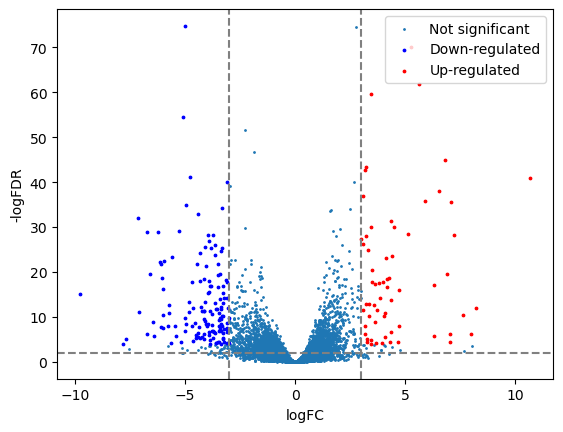

In [46]:
plt.scatter(
    x=full_arabi_results["log2FoldChange"],
    y=full_arabi_results["padj"].apply(lambda x: -np.log10(x)),
    s=1,
    label="Not significant",
)

# highlight down- or up- regulated genes
down_arabi = full_arabi_results[
    (full_arabi_results["log2FoldChange"] <= -3)
    & (full_arabi_results["padj"] <= 0.0001)
]
up_arabi = full_arabi_results[
    (full_arabi_results["log2FoldChange"] >= 3) & (full_arabi_results["padj"] <= 0.0001)
]

plt.scatter(
    x=down_arabi["log2FoldChange"],
    y=down_arabi["padj"].apply(lambda x: -np.log10(x)),
    s=3,
    label="Down-regulated",
    color="blue",
)
plt.scatter(
    x=up_arabi["log2FoldChange"],
    y=up_arabi["padj"].apply(lambda x: -np.log10(x)),
    s=3,
    label="Up-regulated",
    color="red",
)
plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-3, color="grey", linestyle="--")
plt.axvline(3, color="grey", linestyle="--")
plt.axhline(2, color="grey", linestyle="--")
plt.legend()

In [47]:
up_arabi

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Locus,,,,,,
110893at3193,77.094774,4.162603,0.462889,8.992665,2.413069e-19,2.048696e-17
114038at3193,1593.705104,6.541322,0.484945,13.488783,1.820817e-41,1.182138e-38
114515at3193,1533.063783,5.641658,0.328830,17.156747,5.596189e-66,1.544128e-62
115912at3193,32.660289,4.729022,0.760655,6.217041,5.066174e-10,1.225596e-08
128908at3193,51.081909,3.680227,0.825952,4.455741,8.360376e-06,7.333176e-05
...,...,...,...,...,...,...
888273at3193,4445.634296,3.435822,0.203916,16.849188,1.063646e-63,2.347892e-60
888594at3193,63.921027,3.167503,0.504336,6.280538,3.374044e-10,8.497664e-09
889750at3193,105.818794,3.370914,0.427093,7.892693,2.957341e-15,1.640209e-13


/tmp/ipykernel_648866/2187282460.py:3: RuntimeWarning: divide by zero encountered in log10
  y=full_results["padj"].apply(lambda x: -np.log10(x)),
/tmp/ipykernel_648866/2187282460.py:18: RuntimeWarning: divide by zero encountered in log10
  y=down["padj"].apply(lambda x: -np.log10(x)),
/tmp/ipykernel_648866/2187282460.py:25: RuntimeWarning: divide by zero encountered in log10
  y=up["padj"].apply(lambda x: -np.log10(x)),


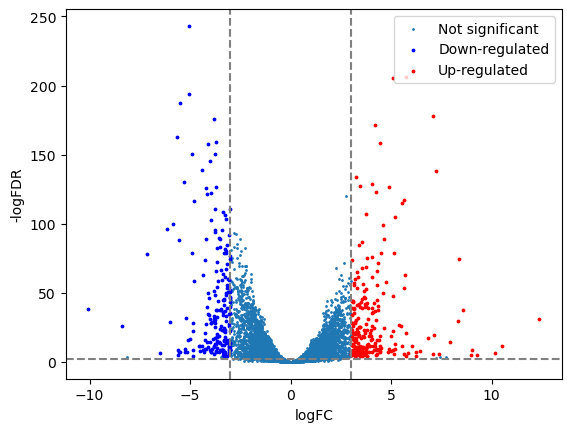

In [49]:
plt.scatter(
    x=full_results["log2FoldChange"],
    y=full_results["padj"].apply(lambda x: -np.log10(x)),
    s=1,
    label="Not significant",
)

# highlight down- or up- regulated genes
down = full_results[
    (full_results["log2FoldChange"] <= -3) & (full_results["padj"] <= 0.0001)
]
up = full_results[
    (full_results["log2FoldChange"] >= 3) & (full_results["padj"] <= 0.0001)
]

plt.scatter(
    x=down["log2FoldChange"],
    y=down["padj"].apply(lambda x: -np.log10(x)),
    s=3,
    label="Down-regulated",
    color="blue",
)
plt.scatter(
    x=up["log2FoldChange"],
    y=up["padj"].apply(lambda x: -np.log10(x)),
    s=3,
    label="Up-regulated",
    color="red",
)
plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-3, color="grey", linestyle="--")
plt.axvline(3, color="grey", linestyle="--")
plt.axhline(2, color="grey", linestyle="--")
plt.legend()

In [50]:
up

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
10238at3193,18.554908,3.286850,0.700979,4.688945,2.746174e-06,7.748211e-06
10488at3193,52.714341,3.370811,0.479025,7.036822,1.966743e-12,1.061378e-11
110152at3193,24.742722,3.032530,0.558824,5.426629,5.742827e-08,1.987988e-07
11017at3193,51.827406,3.575398,0.513246,6.966247,3.255071e-12,1.718912e-11
110343at3193,304.120376,3.624832,0.235374,15.400305,1.628999e-53,9.112053e-52
...,...,...,...,...,...,...
889990at3193,147.367398,3.036290,0.266579,11.389854,4.697765e-30,8.209053e-29
895391at3193,123.323999,5.483741,0.498957,10.990408,4.250022e-28,6.617265e-27
933206at3193,83.063120,4.448669,0.483240,9.205922,3.387493e-20,3.388134e-19
938758at3193,310.969430,4.291252,0.858164,5.000503,5.718093e-07,1.757316e-06
